In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns

In [ ]:
url="https://raw.githubusercontent.com/mohammedAljadd/students-performance-prediction/refs/heads/main/student-data.csv"
df=pd.read_csv(url)

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [ ]:
df.shape


(395, 31)

In [ ]:
df.isnull().sum() #any values null

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
boolean_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

df[boolean_columns] = df[boolean_columns].replace({'yes': 1, 'no': 0})

features = df[['failures', 'health', 'age', 'studytime', 'absences', 'goout', 'freetime'] + boolean_columns]
target=df['passed']

X=features.values
y=target.values

<ipython-input-6-0437cdf16471>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[boolean_columns] = df[boolean_columns].replace({'yes': 1, 'no': 0})


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [ ]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

In [ ]:
scaler=StandardScaler() #to fix weight of multiple features and make it in same range
# normalizing values of x_train and x_test
X_train = scaler.fit_transform(X_train) #normalizing -->look for details
X_test=scaler.transform(X_test) #->>

In [ ]:
X_train=torch.tensor(X_train, dtype=torch.float32)
X_test=torch.tensor(X_test, dtype=torch.float32)

y_train=torch.tensor(y_train, dtype = int)
y_test=torch.tensor(y_test, dtype = int)

In [ ]:

class MultiClassClassifier(nn.Module):
    def __init__(self):
        super(MultiClassClassifier, self).__init__()
        self.Linear1 = nn.Linear(15, 128)
        self.Linear2 = nn.Linear(128, 3)

    def forward(self, x):
        x1 = torch.relu(self.Linear1(x))
        x2 = torch.relu(self.Linear2(x1))
        x3 = torch.softmax(x2, dim=1)
        return x3

In [ ]:
model = MultiClassClassifier()
loss = nn.CrossEntropyLoss()
criteria = torch.optim.SGD(model.parameters(), lr = 0.05)
num_epochs=5000#number of times

In [ ]:
  # creating lists to store etst and train loss
train_loss=[]
test_loss=[]

In [ ]:
# training loop
for ep in range(num_epochs):
  model.train()
  predicted_y = model(X_train)
  losses = loss(predicted_y, y_train)

  #feedback
  criteria.zero_grad()
  losses.backward()
  criteria.step()
  if ep % 100 == 0:
    print(f"Epoch {ep}: Loss = {losses.item()}")

  train_loss.append(losses.item())
  model.eval()
  with torch.no_grad():
    predicted_test_y=model(X_test)
    loss_test=loss(predicted_test_y,y_test)
    test_loss.append(loss_test.item())
    if ep % 100 == 0:
      print(f"Epoch {ep}: Loss = {test_loss}")

Epoch 0: Loss = 1.0972347259521484
Epoch 0: Loss = [1.102203369140625]
Epoch 100: Loss = 0.8874734044075012
Epoch 100: Loss = [1.102203369140625, 1.1015183925628662, 1.1006039381027222, 1.0994290113449097, 1.0980827808380127, 1.0963481664657593, 1.094430685043335, 1.0922939777374268, 1.0899044275283813, 1.086816668510437, 1.0831148624420166, 1.0791771411895752, 1.074662446975708, 1.0697988271713257, 1.0648845434188843, 1.0599474906921387, 1.0549426078796387, 1.0500221252441406, 1.0452609062194824, 1.0405914783477783, 1.0360560417175293, 1.031665325164795, 1.027405023574829, 1.0232820510864258, 1.019288182258606, 1.0154398679733276, 1.0117274522781372, 1.0081593990325928, 1.0047070980072021, 1.0014009475708008, 0.9982423186302185, 0.9952149391174316, 0.9923014640808105, 0.9895094633102417, 0.986835241317749, 0.9842652678489685, 0.9818058013916016, 0.9794445037841797, 0.9771806597709656, 0.9750111103057861, 0.9729347825050354, 0.9709455370903015, 0.9690466523170471, 0.9672321081161499, 0

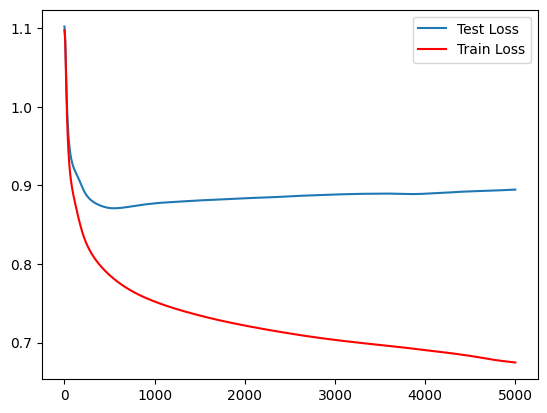

In [ ]:
plt.plot(test_loss, label = 'Test Loss')
plt.plot(train_loss, color='red', label = 'Train Loss')
plt.legend()
plt.show()

[[11 16]
 [13 39]]


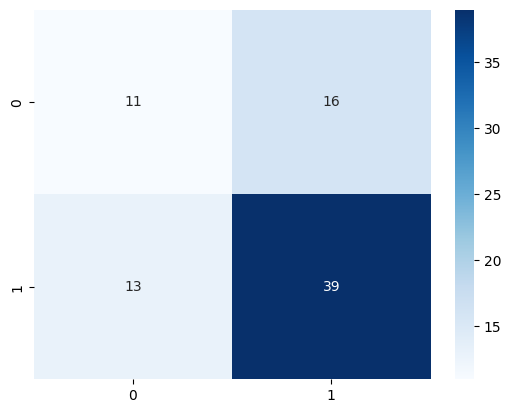

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_test_y.argmax(dim=1))  # Use .argmax to get the predicted class indices
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels='auto', yticklabels='auto')
plt.show()

In [1]:
#calculating accuracy
with torch.no_grad():
  outputs=model(X_test)
  _, predicted_classes=torch.max(outputs.data,1)  #get predicted classes

accuracy=(predicted_classes==y_test).sum().item()/y_test.size(0)
print(accuracy)

NameError: name 'torch' is not defined